<a href="https://colab.research.google.com/github/Running-Machine-ML23-2/Extra_credit/blob/main/Extra_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 압축 해제**

In [ ]:
from zipfile import ZipFile
import os

# 압축 해제할 파일 경로
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/ts.zip'

# 압축을 해제할 디렉토리 경로
extracted_path = '/content/drive/MyDrive/Colab Notebooks'


# Zip 파일 열기
with ZipFile(zip_file_path, 'r') as zip_ref:
    # 모든 파일을 지정된 디렉토리로 추출
    zip_ref.extractall(extracted_path)

print(f'{zip_file_path} 파일이 성공적으로 압축 해제되었습니다.')


KeyboardInterrupt: ignored



# **데이터 추출**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import random
# 파일 경로 설정
folder_path = "/content/drive/MyDrive/ts"
output_path = "/content/drive/MyDrive/Colab Notebooks/extra_data.pkl"

# 데이터를 저장할 리스트
data_list = {'X1': [], 'X2': [], 'y': []}

# 파일 목록 가져오기
file_list = os.listdir(folder_path)
# random.shuffle(file_list)
# file_list=file_list
file_list.sort(reverse=True)


In [ ]:

# 파일을 읽어서 데이터 처리
for idx, file_name in enumerate(file_list, start=1):
    if file_name.endswith(".cell"):
        file_path = os.path.join(folder_path, file_name)

        if "join" in file_name:
          with open(file_path, "r") as file:
              print(f"Working on file {idx}/{len(file_list)} - {file_name}")
              lines = file.readlines()
              x1_values = []
              x2_values = []
              for line in lines:
                  parts = line.strip().split('\t')
                  x1_values.append(float(parts[0]))
                  x2_values.append(float(parts[2]))

              y = int(file_name.split('-')[0])
              # 데이터를 딕셔너리로 저장
              data_list['X1'].append(x1_values)
              data_list['X2'].append(x2_values)
              data_list['y'].append(y)

df = pd.DataFrame(data_list)

# DataFrame을 pkl 파일로 저장
df.to_pickle(output_path)

print("데이터 전처리 및 저장이 완료되었습니다.")






































# **데이터 학습 & 결과**

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data from the pickle file
file_path = "/content/drive/MyDrive/Colab Notebooks/Extra_Credit/extra_data.pkl"
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Separate features (X1, X2) and target variable (y)
X1_mon = data['X1']
X2_mon= (data['X2'])
y = (data['y'])
X1_mon = [[round(float(value), 2) for value in sequence] for sequence in X1_mon]
X2_mon = [[round(float(value), 2) for value in sequence] for sequence in X2_mon]
y = y.tolist()

print(f'Total samples: {len(X1_mon)}')
print(f'Total samples: {len(y)}')

Total samples: 13309
Total samples: 13309


In [ ]:
outgoing_packets_fraction = []  # Array to store the outgoing packets fraction for unmonitored data
std_outgoing_packet_ordering = []  # Array to store the standard deviation of outgoing packet ordering for unmonitored data

for i in range(len(X1_mon)):
    outgoing_packets = 0
    packet_ordering = []
    for j in range(len(X1_mon[i])):
        if X2_mon[i][j] > 0:
            outgoing_packets += 1
            packet_ordering.append(X1_mon[i][j])
    outgoing_packets_fraction.append(outgoing_packets / len(X1_mon[i]))
    std_outgoing_packet_ordering.append(np.std(packet_ordering))

In [ ]:
MAX_SEQUENCE_LENGTH = 100  # 시퀀스의 최대 길이

def pad_sequence(seq, max_length):
    if len(seq) < max_length:
        seq += [0] * (max_length - len(seq))  # 패딩
    else:
        seq = seq[:max_length]  # 잘라냄
    return seq

def compute_bursts(sequence):
    bursts = []
    current_burst = sequence[0]

    for size in sequence[1:]:
        if np.sign(size) == np.sign(current_burst):
            current_burst += size
        else:
            bursts.append(current_burst)
            current_burst = size
    bursts.append(current_burst)
    return bursts

X2_all = X2_mon

X1_all= X1_mon

X2_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X2_all]
X1_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X1_all]

X_mon_bursts = [pad_sequence(compute_bursts(x), MAX_SEQUENCE_LENGTH) for x in X2_mon]

X_mon_cumsum = [pad_sequence(np.cumsum(x).tolist(), MAX_SEQUENCE_LENGTH) for x in X2_mon]


num_packets = [sum(1 for size in instance_sizes if size < 0) for instance_sizes in X2_mon]
X_CAT1 = num_packets
X_CAT2 = outgoing_packets_fraction
X_CAT4 = std_outgoing_packet_ordering

X_CAT1 = np.array(X_CAT1).reshape(-1, 1)
X_CAT2 = np.array(X_CAT2).reshape(-1, 1)
X_CAT4 = np.array(X_CAT4).reshape(-1, 1)


In [ ]:
# 피처 목록
features = [X2_all, X1_all, X_mon_bursts, X_mon_cumsum, X_CAT1, X_CAT2, X_CAT4]
feature_names = ['X2_all', 'X1_all', 'X_mon_bursts', 'X_mon_cumsum', 'X_CAT1', 'X_CAT2', 'X_CAT4']  # 피처 이름



Training KNN...


KNN Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:01,  1.85s/it]
Subset Progress: 2it [00:04,  2.32s/it]
Subset Progress: 3it [00:05,  1.76s/it]
Subset Progress: 4it [00:06,  1.30s/it]
Subset Progress: 5it [00:06,  1.12it/s]
Subset Progress: 6it [00:06,  1.50it/s]
Subset Progress: 7it [00:06,  2.01it/s]
KNN Progress:  14%|█▍        | 1/7 [00:06<00:40,  6.75s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:00,  1.20it/s]
Subset Progress: 2it [00:01,  1.14it/s]
Subset Progress: 3it [00:02,  1.17it/s]
Subset Progress: 4it [00:03,  1.37it/s]
Subset Progress: 5it [00:03,  1.53it/s]
Subset Progress: 6it [00:04,  1.62it/s]
Subset Progress: 7it [00:05,  1.43it/s]
Subset Progress: 8it [00:05,  1.36it/s]
Subset Progress: 9it [00:06,  1.25it/s]
Subset Progress: 10it [00:07,  1.29it/s]
Subset Progress: 11it [00:08,  1.43it/s]
Subset Progress: 12it [00:09,  1.26it/s]
Subset Progress: 13it [00:11,  1.23s/it]
Subset Progr


Best subset for KNN: ['X2_all', 'X_mon_cumsum', 'X_CAT1']
Best accuracy: 0.517

Training Decision Tree...


Decision Tree Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:00,  1.69it/s]
Subset Progress: 2it [00:04,  2.69s/it]
Subset Progress: 3it [00:05,  2.02s/it]
Subset Progress: 4it [00:06,  1.48s/it]
Subset Progress: 6it [00:06,  1.37it/s]
Decision Tree Progress:  14%|█▍        | 1/7 [00:06<00:41,  6.86s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:03,  3.54s/it]
Subset Progress: 2it [00:05,  2.36s/it]
Subset Progress: 3it [00:06,  1.72s/it]
Subset Progress: 4it [00:06,  1.19s/it]
Subset Progress: 5it [00:06,  1.11it/s]
Subset Progress: 6it [00:07,  1.37it/s]
Subset Progress: 7it [00:13,  2.46s/it]
Subset Progress: 8it [00:17,  2.91s/it]
Subset Progress: 9it [00:20,  2.94s/it]
Subset Progress: 10it [00:23,  3.03s/it]
Subset Progress: 11it [00:27,  3.49s/it]
Subset Progress: 12it [00:30,  3.20s/it]
Subset Progress: 13it [00:32,  2.71s/it]
Subset Progress: 14it [00:33,  2.28s/it]
Subset Progress: 15it [00:34,  


Best subset for Decision Tree: ['X_mon_cumsum', 'X_CAT1', 'X_CAT2']
Best accuracy: 0.675

Training Random Forest...


Random Forest Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:04,  4.37s/it]
Subset Progress: 2it [00:28, 16.00s/it]
Subset Progress: 3it [00:40, 13.96s/it]
Subset Progress: 4it [00:44, 10.37s/it]
Subset Progress: 5it [00:49,  8.34s/it]
Subset Progress: 6it [00:55,  7.42s/it]
Subset Progress: 7it [01:00,  6.70s/it]
Random Forest Progress:  14%|█▍        | 1/7 [01:00<06:03, 60.52s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:21, 21.17s/it]
Subset Progress: 2it [00:31, 14.62s/it]
Subset Progress: 3it [00:36, 10.35s/it]
Subset Progress: 4it [00:42,  8.46s/it]
Subset Progress: 5it [00:46,  6.95s/it]
Subset Progress: 6it [00:49,  5.84s/it]
Subset Progress: 7it [01:16, 12.70s/it]
Subset Progress: 8it [01:35, 14.73s/it]
Subset Progress: 9it [01:59, 17.55s/it]
Subset Progress: 10it [02:25, 20.01s/it]
Subset Progress: 11it [02:49, 21.31s/it]
Subset Progress: 12it [03:00, 18.07s/it]
Subset Progress: 13it [03:10, 15.


Best subset for Random Forest: ['X_mon_cumsum', 'X_CAT1', 'X_CAT2', 'X_CAT4']
Best accuracy: 0.797

Training AdaBoost...


AdaBoost Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:03,  3.74s/it]
Subset Progress: 2it [00:10,  5.78s/it]
Subset Progress: 3it [00:14,  4.70s/it]
Subset Progress: 4it [00:18,  4.44s/it]
Subset Progress: 5it [00:21,  3.84s/it]
Subset Progress: 6it [00:23,  3.39s/it]
Subset Progress: 7it [00:25,  2.85s/it]
AdaBoost Progress:  14%|█▍        | 1/7 [00:25<02:32, 25.45s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:07,  7.36s/it]
Subset Progress: 2it [00:13,  6.77s/it]
Subset Progress: 3it [00:18,  5.76s/it]
Subset Progress: 4it [00:20,  4.45s/it]
Subset Progress: 5it [00:23,  3.75s/it]
Subset Progress: 6it [00:26,  3.53s/it]
Subset Progress: 7it [00:36,  5.79s/it]
Subset Progress: 8it [00:47,  7.26s/it]
Subset Progress: 9it [00:54,  7.17s/it]
Subset Progress: 10it [01:01,  7.31s/it]
Subset Progress: 11it [01:09,  7.48s/it]
Subset Progress: 12it [01:15,  6.88s/it]
Subset Progress: 13it [01:20,  6.39s/it]
Su


Best subset for AdaBoost: ['X2_all', 'X_CAT2', 'X_CAT4']
Best accuracy: 0.079

Training NN (MLP)...


NN (MLP) Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:16, 16.95s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Subset Progress: 2it [00:56, 29.97s/it]
Subset Progress: 3it [01:10, 22.89s/it]
Subset Progress: 4it [01:31, 22.02s/it]
Subset Progress: 5it [01:34, 15.22s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Subset Progress: 6it [02:05, 20.68s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet


Best subset for NN (MLP): ['X1_all', 'X_CAT2', 'X_CAT4']
Best accuracy: 0.490


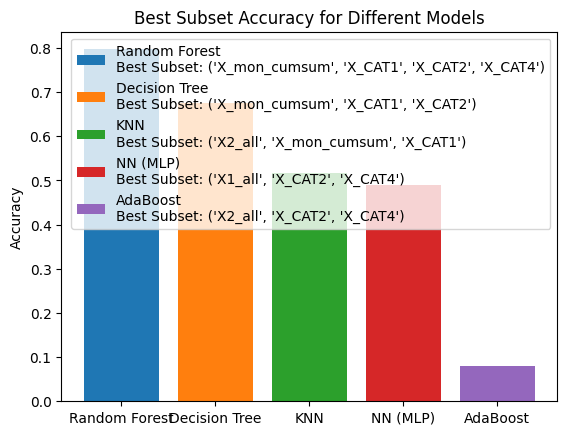

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from itertools import combinations


# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "NN (MLP)": MLPClassifier(random_state=42)
}

# Dictionary to store results for each model
all_results = {model: {} for model in models}

# Loop through each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    best_accuracy = 0.0
    best_subset = None

    # Loop through all feature subsets with tqdm progress bar
    for r in tqdm(range(1, len(features) + 1), desc=f'{model_name} Progress'):
        for subset_indices in tqdm(combinations(range(len(features)), r), desc='Subset Progress', leave=False):
            subset = [features[i] for i in subset_indices]
            subset_names = [feature_names[i] for i in subset_indices]

            X = np.concatenate([np.array(feature) for feature in subset], axis=1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)

            # Update best subset if current accuracy is higher
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_subset = subset_names

            # Store accuracy for the current subset
            all_results[model_name][tuple(subset_names)] = accuracy

    # Print the best subset and accuracy for each model
    print(f"\nBest subset for {model_name}: {best_subset}")
    print(f"Best accuracy: {best_accuracy:.3f}")

# Plotting
import matplotlib.pyplot as plt

# Sort models by their best accuracy
sorted_models = sorted(models.keys(), key=lambda x: max(all_results[x].values()), reverse=True)

# Plot the accuracies
for model_name in sorted_models:
    best_subset = max(all_results[model_name], key=all_results[model_name].get)
    best_accuracy = all_results[model_name][best_subset]

    plt.bar(model_name, best_accuracy, label=f"{model_name}\nBest Subset: {best_subset}")

plt.ylabel("Accuracy")
plt.title("Best Subset Accuracy for Different Models")
plt.legend()
plt.show()


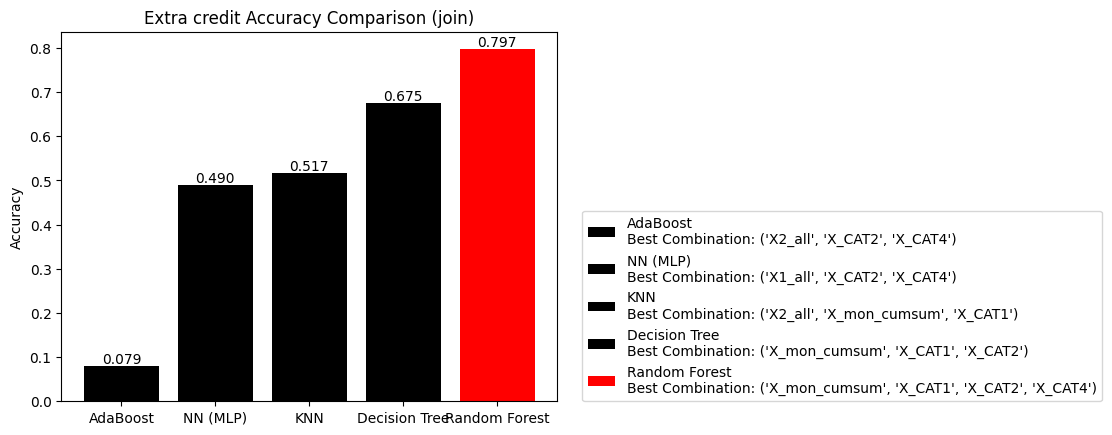

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sort models by their best accuracy
sorted_models = sorted(models.keys(), key=lambda x: max(all_results[x].values()), reverse=False)

# Set colors
colors = ['red' if model_name == sorted_models[4] else 'black' for model_name in sorted_models]

# Plot the accuracies
fig, ax = plt.subplots()
bars = ax.bar(sorted_models, [all_results[model_name][max(all_results[model_name], key=all_results[model_name].get)] for model_name in sorted_models], color=colors)

# Annotate the bars with accuracy values
for bar, model_name in zip(bars, sorted_models):
    accuracy = all_results[model_name][max(all_results[model_name], key=all_results[model_name].get)]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.3f}', ha='center', va='bottom')

# Set colors for text and labels
text_color = 'black'
ax.set_ylabel("Accuracy", color=text_color)
ax.set_title("Extra credit Accuracy Comparison (join)", color=text_color)


# Add a legend
legend_labels = [f"{model_name}\nBest Combination: {max(all_results[model_name], key=all_results[model_name].get)}" for model_name in sorted_models]
ax.legend(bars, legend_labels, loc='lower right')

# Move the legend to the right of the plot
ax.legend(bars, legend_labels, bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

plt.show()
